In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import imghdr
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = "C:\Data"
os.listdir(data_dir)

['active pulmonary tuberculosis',
 'Emphysema and bronchiectasis',
 'ILD',
 'normal',
 'old  pulmonary tuberculosis, with post infective bronchiectasis',
 'old  pulmonary tuberculosis, with post tubercular bronchiectasis',
 'Old TB',
 'pneumonia and bronchiectasis']

In [3]:
image_ext = ['jpeg','jpg','png','bmp']

In [4]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        try:
                
            image_path = os.listdir(os.path.join(data_dir,image_class,image))
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                os.remove(image_path)
        except Exception as e:
            print("no remove")
            
        

no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove


In [5]:
img = cv2.imread(os.path.join("C:\Data",'normal','2108.jpg'))
img.shape

(268, 512, 3)

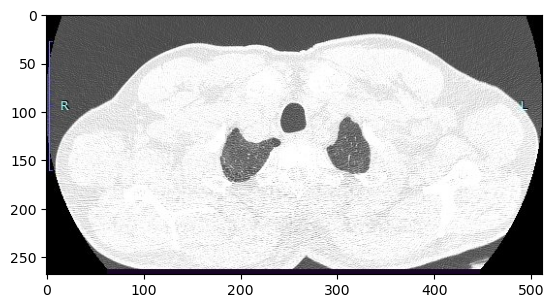

In [6]:
plt.imshow(img)

In [7]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 568 files belonging to 8 classes.
Using 455 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 568 files belonging to 8 classes.
Using 113 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Emphysema and bronchiectasis', 'ILD', 'Old TB', 'active pulmonary tuberculosis', 'normal', 'old  pulmonary tuberculosis, with post infective bronchiectasis', 'old  pulmonary tuberculosis, with post tubercular bronchiectasis', 'pneumonia and bronchiectasis']


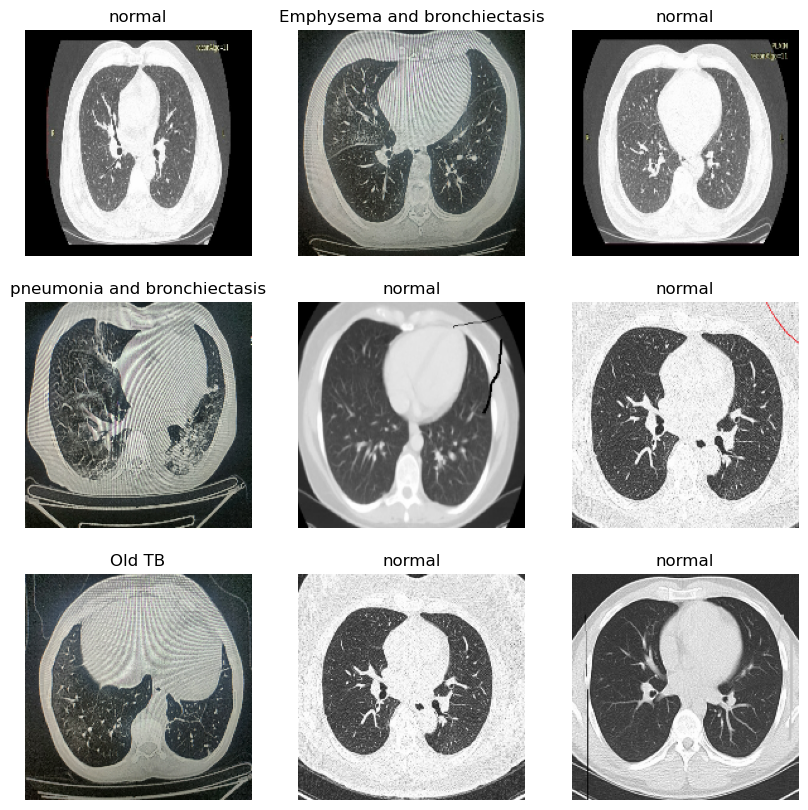

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
num_classes = 8

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


C:\Users\adith\AppData\Roaming\Python\Python310\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 [==============================] - 24s 1s/step - loss: 1.6045 - accuracy: 0.3912 - val_loss: 0.8940 - val_accuracy: 0.6637
Epoch 2/10
15/15 [==============================] - 21s 941ms/step - loss: 0.4842 - accuracy: 0.8505 - val_loss: 0.2044 - val_accuracy: 0.9558
Epoch 3/10
15/15 [==============================] - 20s 933ms/step - loss: 0.1763 - accuracy: 0.9473 - val_loss: 0.1297 - val_accuracy: 0.9646
Epoch 4/10
15/15 [==============================] - 20s 922ms/step - loss: 0.0454 - accuracy: 0.9868 - val_loss: 0.0821 - val_accuracy: 0.9646
Epoch 5/10
15/15 [==============================] - 20s 921ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9823
Epoch 6/10
15/15 [==============================] - 20s 924ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9823
Epoch 7/10
15/15 [==============================] - 20s 931ms/step - loss: 7.4063e-04 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9823
Epoch 8/1

KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal',label = 'loss')
plt.plot(history.history['val_loss'], color='orange',label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal',label = 'accuracy')
plt.plot(history.history['val_accuracy'], color='orange',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(val_ds, steps=50)
print('Test accuracy:', test_acc)

In [ ]:
img = cv2.imread(r'C:\Users\adith\OneDrive\Desktop\hospit\Negative/0.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (180,180))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

In [ ]:
value = model.predict(np.expand_dims(resize/255 , 0))

In [ ]:
value

In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(value)], 100 * np.max(value))
)

In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')